# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sakti Kusuma Aji
- **Email:** skarluajitkas@gmail.com
- **ID Dicoding:** saktikusumaaji

## Menentukan Pertanyaan Bisnis

- Apa saja 10 kategori produk yang paling banyak dan paling sedikit diminati oleh pelanggan selama periode 2016-2018?

- Bagaimana demografi pelanggan berdasarkan state dan metode pembayaran apa yang paling sering mereka gunakan selama periode 2016-2018?

- Pertanyaan 3 (Analisis Lanjutan): Bagaimana segmentasi pelanggan berdasarkan perilaku pembelian mereka (Recency, Frequency, & Monetary) pada akhir periode data?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat dataset yang dibutuhkan.

In [2]:
customers_df = pd.read_csv('customers_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
product_translation_df = pd.read_csv('product_category_name_translation.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

print("Data berhasil dimuat.")
customers_df.head()

Data berhasil dimuat.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Proses pengumpulan data berhasil dilakukan dengan memuat enam file CSV ke dalam DataFrame yang terpisah.

- Data customers_df berisi informasi terkait pelanggan seperti customer_id yang unik untuk setiap pesanan dan customer_unique_id yang unik untuk setiap pelanggan, beserta informasi lokasi mereka.

### Assessing Data

Pemeriksaan data untuk mengidentifikasi masalah seperti nilai yang hilang (missing values), tipe data yang salah, atau duplikasi.

In [3]:
print('--- Customers Info ---')
customers_df.info()
print('\n--- Orders Info ---')
orders_df.info()
print('\n--- Order Items Info ---')
order_items_df.info()
print('\n--- Products Info ---')
products_df.info()
print('\n--- Payments Info ---')
payments_df.info()

print('\n--- Pengecekan Missing Values ---')
print("Customers:", customers_df.isnull().sum().sum())
print("Orders:", orders_df.isnull().sum().sum())
print("Order Items:", order_items_df.isnull().sum().sum())
print("Products:", products_df.isnull().sum().sum())
print("Payments:", payments_df.isnull().sum().sum())

print('\n--- Pengecekan Duplikasi ---')
print("Customers:", customers_df.duplicated().sum())
print("Orders:", orders_df.duplicated().sum())
print("Order Items:", order_items_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Payments:", payments_df.duplicated().sum())

--- Customers Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

--- Orders Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purcha

**Insight:**
- Tipe Data: Beberapa kolom tanggal (order_purchase_timestamp, order_approved_at, dll.) masih dalam format object dan perlu diubah ke format datetime.

- Nilai Hilang (Missing Values): Terdapat nilai yang hilang pada dataset orders_df (di kolom tanggal pengiriman) dan products_df (di kolom kategori produk dan atribut lainnya). Karena pertanyaan bisnis kita tidak terlalu bergantung pada tanggal pengiriman, kita bisa mengabaikannya. Namun, nilai yang hilang pada kategori produk perlu ditangani.

- Duplikasi: Tidak ditemukan adanya data duplikat pada semua dataset yang diperiksa, yang menandakan data cukup bersih dari sisi ini.

### Cleaning Data

Membersihkan data berdasarkan temuan dari proses assessing. Kita akan menghapus baris dengan nilai kategori produk yang kosong karena informasi ini krusial untuk menjawab pertanyaan bisnis pertama.

In [4]:
products_df.dropna(subset=['product_category_name'], inplace=True)

print("Missing values di 'product_category_name' setelah cleaning:", products_df['product_category_name'].isnull().sum())

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

Missing values di 'product_category_name' setelah cleaning: 0


**Insight:**
- Proses pembersihan berhasil dilakukan. Semua baris yang tidak memiliki product_category_name pada products_df telah dihapus. Ini memastikan bahwa analisis kategori produk kita akan didasarkan pada data yang lengkap dan akurat.
- Kolom tanggal pembelian telah diubah ke format datetime, memungkinkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

#### Explore Data Penjualan Berdasarkan Kategori
Kita akan menggabungkan data terkait pesanan dan produk untuk mendapatkan wawasan tentang penjualan per kategori.


In [5]:
# Pertanyaan 1: Kategori Produk
# Gabungkan order_items dengan products
order_products_df = pd.merge(
    order_items_df,
    products_df,
    on='product_id',
    how='inner'
)

# Gabungkan dengan terjemahan kategori
sales_by_category_df = pd.merge(
    order_products_df,
    product_translation_df,
    on='product_category_name',
    how='inner'
)

In [6]:
# Menampilkan 5 baris pertama data gabungan
print("Sample Data Penjualan per Kategori:")
display(sales_by_category_df.head())

Sample Data Penjualan per Kategori:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [7]:
# Menampilkan ringkasan statistik
print("\nRingkasan Statistik Data Penjualan:")
display(sales_by_category_df.describe())


Ringkasan Statistik Data Penjualan:


,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111022.000000,111022.000000,111022.000000,111022.000000
mean,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.897507,30.212210,16.624966,23.042172
std,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.972723,16.190473,13.468184,11.717712
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [8]:
# Menampilkan agregasi harga dan ongkos kirim per kategori (top 5 berdasarkan jumlah pesanan)
print("\nAgregasi per Kategori Produk:")
display(sales_by_category_df.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['min', 'max', 'mean'],
    'freight_value': ['min', 'max', 'mean']
}).sort_values(by=('order_id', 'nunique'), ascending=False).head())


Agregasi per Kategori Produk:


order_id price                       \
                               nunique   min      max        mean   
product_category_name_english                                       
bed_bath_table                    9417  6.99  1999.98   93.296327   
health_beauty                     8836  1.20  3124.00  130.163531   
sports_leisure                    7720  4.50  4059.00  114.344285   
computers_accessories             6689  3.90  3699.99  116.513903   
furniture_decor                   6449  4.90  1899.00   87.564494   

                              freight_value                     
                                        min     max       mean  
product_category_name_english                                   
bed_bath_table                         0.00  225.71  18.415928  
health_beauty                          0.00  338.30  18.879703  
sports_leisure                         0.01  293.27  19.512500  
computers_accessories                  0.06  134.17  18.821781  
furniture_decor                        0.00  215.43  20.728258

**Insight:**
- Dari describe(), terlihat bahwa harga (price) produk memiliki rentang yang sangat lebar, dari 2.29 hingga 6735, dengan rata-rata sekitar 120. Hal ini menandakan variasi produk yang sangat beragam.

- Agregasi data menunjukkan bahwa kategori bed_bath_table adalah yang paling populer berdasarkan jumlah pesanan unik. Kategori ini juga memiliki rentang harga yang luas, yang mungkin menjadi salah satu faktor popularitasnya.

#### Explore Data Demografi Pelanggan
Selanjutnya, kita akan menggabungkan data pesanan dan pelanggan untuk memahami karakteristik demografis mereka.

In [9]:
# Menggabungkan data untuk analisis demografi
customer_orders_df = pd.merge(
    orders_df,
    customers_df,
    on='customer_id',
    how='inner'
)

In [10]:
# Menampilkan 5 baris pertama
print("Sample Data Demografi Pelanggan:")
display(customer_orders_df.head())

Sample Data Demografi Pelanggan:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [11]:
# Menampilkan jumlah pesanan unik per kota dan negara bagian (top 5)
print("\nJumlah Pelanggan Unik per Kota (Top 5):")
display(customer_orders_df.groupby('customer_city')['customer_unique_id'].nunique().nlargest(5))


Jumlah Pelanggan Unik per Kota (Top 5):


,customer_unique_id
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465


In [12]:
print("\nJumlah Pelanggan Unik per Negara Bagian (Top 5):")
display(customer_orders_df.groupby('customer_state')['customer_unique_id'].nunique().nlargest(5))


Jumlah Pelanggan Unik per Negara Bagian (Top 5):


,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882


**Insight:**
- Eksplorasi data demografis dengan jelas menunjukkan bahwa mayoritas pelanggan berasal dari kota sao paulo dan negara bagian SP (São Paulo). Ini menegaskan bahwa wilayah ini adalah pasar utama dan pusat kegiatan e-commerce.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Menghitung jumlah item yang terjual untuk setiap kategori produk, lalu mengurutkannya untuk menemukan 10 kategori teratas dan 10 kategori terbawah.

/tmp/ipython-input-2486498249.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis', ax=axes[0])
/tmp/ipython-input-2486498249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_categories.values, y=bottom_10_categories.index, palette='plasma', ax=axes[1])


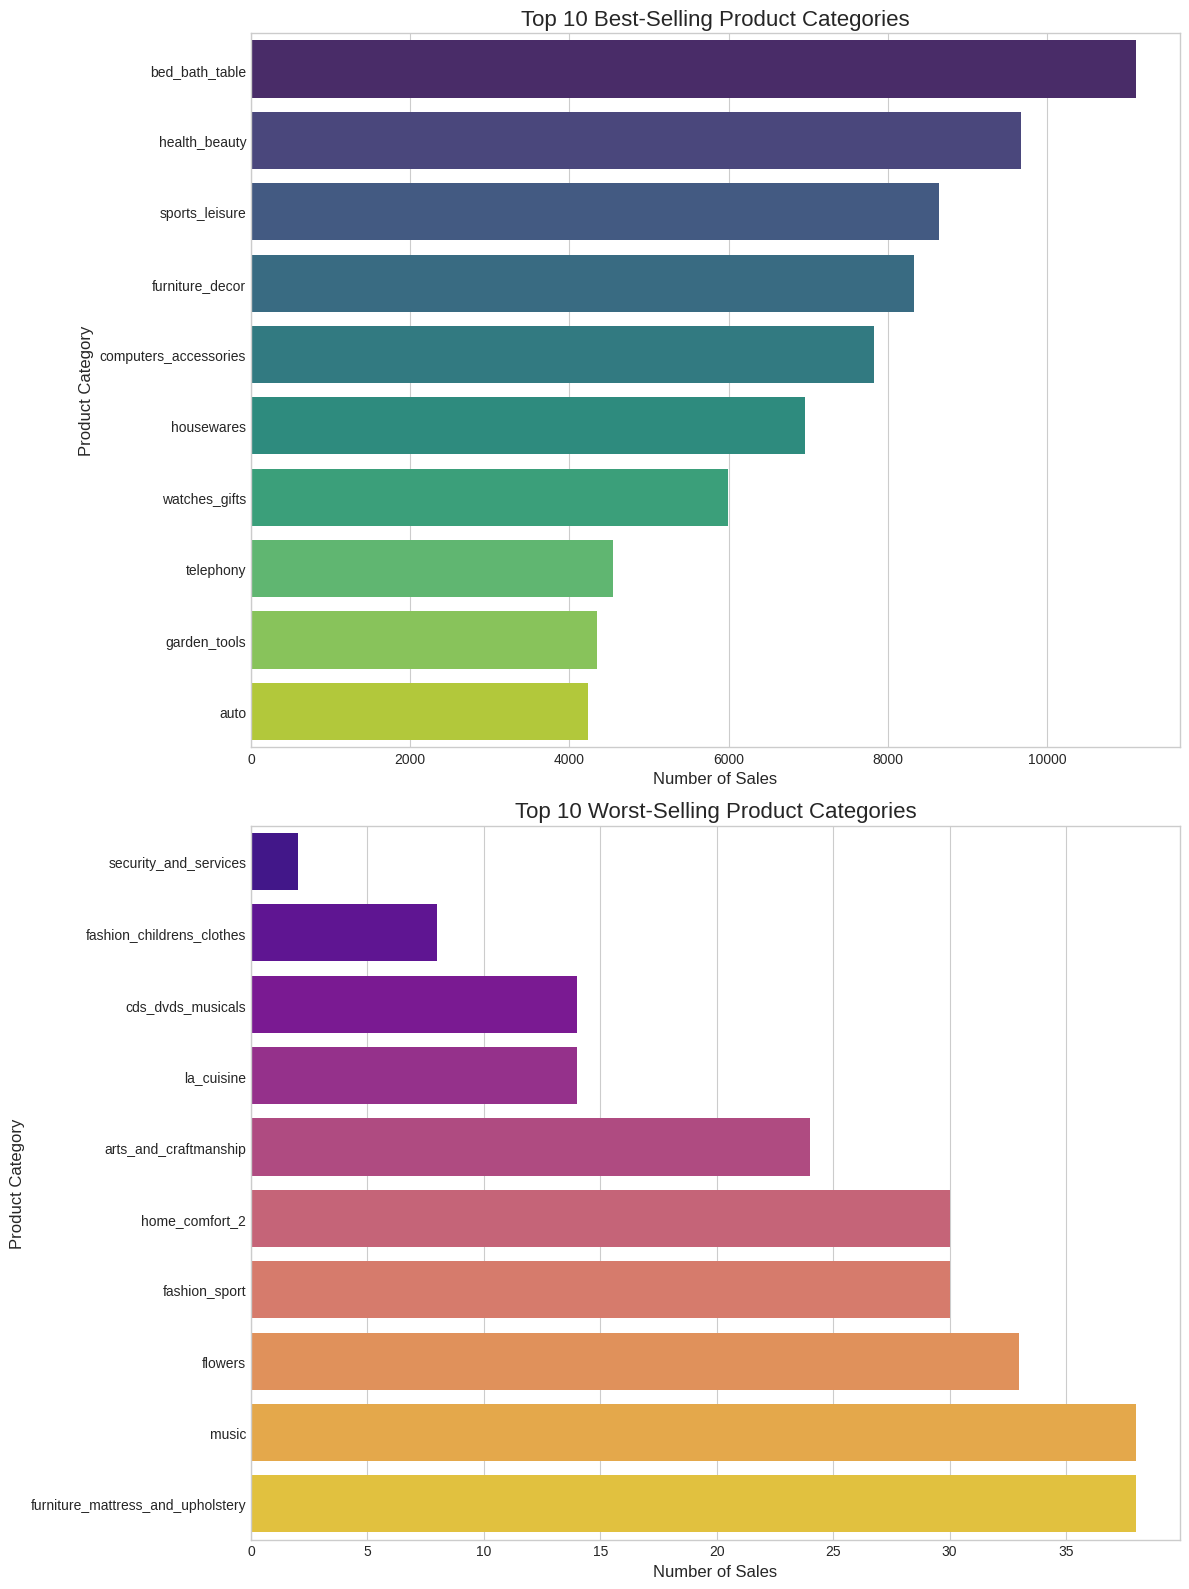

In [13]:
# Hitung penjualan per kategori
category_sales = sales_by_category_df['product_category_name_english'].value_counts()

# Siapkan data untuk plot
top_10_categories = category_sales.head(10)
bottom_10_categories = category_sales.tail(10).sort_values(ascending=True)

# Membuat visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Plot Top 10
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Best-Selling Product Categories', fontsize=16)
axes[0].set_xlabel('Number of Sales', fontsize=12)
axes[0].set_ylabel('Product Category', fontsize=12)

# Plot Bottom 10
sns.barplot(x=bottom_10_categories.values, y=bottom_10_categories.index, palette='plasma', ax=axes[1])
axes[1].set_title('Top 10 Worst-Selling Product Categories', fontsize=16)
axes[1].set_xlabel('Number of Sales', fontsize=12)
axes[1].set_ylabel('Product Category', fontsize=12)

plt.tight_layout()
plt.savefig('category_sales_plot.png')
plt.show()

### Pertanyaan 2:

Membuat dua visualisasi: satu menunjukkan distribusi pelanggan berdasarkan negara bagian, dan satu lagi menunjukkan popularitas berbagai metode pembayaran.

In [15]:
# Menggabungkan orders_df dengan payments_df untuk analisis pembayaran
payment_details_df = pd.merge(
    orders_df,
    payments_df,
    on='order_id',
    how='inner'
)

/tmp/ipython-input-2660158079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_by_state.values, y=customers_by_state.index, palette='mako', ax=axes[0])
/tmp/ipython-input-2660158079.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payments_by_type.values, y=payments_by_type.index, palette='rocket', ax=axes[1])


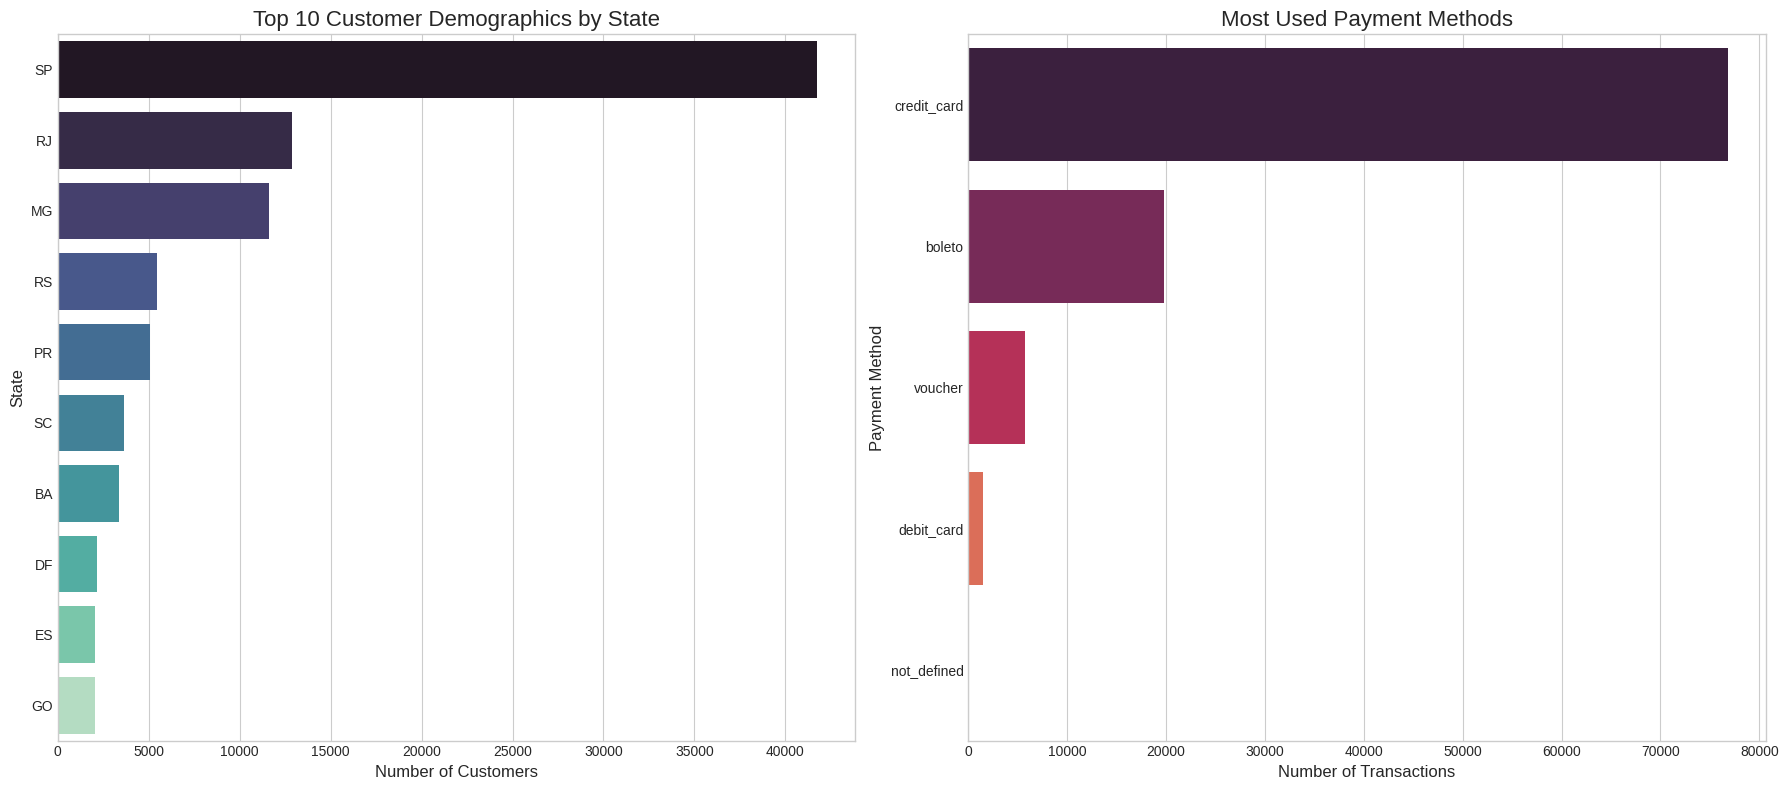

In [16]:
# Hitung pelanggan per state dan pembayaran per tipe
customers_by_state = customer_orders_df['customer_state'].value_counts().head(10)
payments_by_type = payment_details_df['payment_type'].value_counts()

# Membuat visualisasi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot Demografi Pelanggan
sns.barplot(x=customers_by_state.values, y=customers_by_state.index, palette='mako', ax=axes[0])
axes[0].set_title('Top 10 Customer Demographics by State', fontsize=16)
axes[0].set_xlabel('Number of Customers', fontsize=12)
axes[0].set_ylabel('State', fontsize=12)

# Plot Metode Pembayaran
sns.barplot(x=payments_by_type.values, y=payments_by_type.index, palette='rocket', ax=axes[1])
axes[1].set_title('Most Used Payment Methods', fontsize=16)
axes[1].set_xlabel('Number of Transactions', fontsize=12)
axes[1].set_ylabel('Payment Method', fontsize=12)

plt.tight_layout()
plt.savefig('demographics_payment_plot.png')
plt.show()

**Insight:**
- Pertanyaan 1: Visualisasi di atas dengan jelas menunjukkan kategori produk yang paling dominan dan yang kurang diminati. Bed Bath Table menjadi kategori dengan penjualan tertinggi, menandakan tingginya permintaan untuk produk perlengkapan rumah tangga. Di sisi lain, kategori seperti Security and Services memiliki penjualan yang sangat rendah, menunjukkan bahwa produk dalam kategori ini kurang populer di kalangan pelanggan.

- Pertanyaan 2: Dari grafik demografi, terlihat bahwa negara bagian SP (São Paulo) memiliki jumlah pelanggan terbanyak secara signifikan, yang menunjukkan bahwa area ini merupakan pasar terbesar. Sementara itu, grafik metode pembayaran menunjukkan bahwa credit card (kartu kredit) adalah metode pembayaran yang paling populer dan mendominasi, diikuti oleh boleto dan voucher. Tipe pembayaran not_defined memiliki frekuensi yang sangat kecil, menandakan data pembayaran cukup lengkap.

## Analisis Lanjutan (Opsional)

 **Persiapan Data untuk RFM**

Pertama, kita akan menggabungkan data dari orders_df, payments_df, dan customers_df untuk mendapatkan semua informasi yang dibutuhkan (customer_unique_id, order_purchase_timestamp, payment_value) dalam satu DataFrame.

In [17]:
# Menggabungkan semua dataframe yang relevan
rfm_df = pd.merge(
    orders_df,
    customers_df,
    on='customer_id'
)
rfm_df = pd.merge(
    rfm_df,
    payments_df,
    on='order_id'
)

# Menyiapkan dataframe akhir untuk RFM
rfm_df = rfm_df.groupby('customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'payment_value': 'sum'
})

rfm_df.columns = ['customer_unique_id', 'max_purchase_date', 'frequency', 'monetary']

# Menghitung Recency
snapshot_date = rfm_df['max_purchase_date'].max() + pd.Timedelta(days=1)
rfm_df['recency'] = (snapshot_date - rfm_df['max_purchase_date']).dt.days

# Membuang kolom tanggal yang tidak diperlukan lagi
rfm_df.drop('max_purchase_date', axis=1, inplace=True)

print("Data RFM berhasil disiapkan:")
rfm_df.head()

Data RFM berhasil disiapkan:


,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,161
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,164
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


**Membuat Skor RFM dan Segmentasi Pelanggan**


Setelah nilai Recency, Frequency, dan Monetary dihitung, kita akan membuat skor untuk masing-masing metrik menggunakan kuantil. Pelanggan akan dibagi ke dalam 4 kelompok (kuartil) untuk setiap metrik.
Kemudian, kita akan membuat segmen pelanggan berdasarkan kombinasi skor RFM mereka.

In [18]:
# Membuat skor RFM berdasarkan kuartil
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

# Menggabungkan skor menjadi satu kolom 'RFM_Score'
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Membuat segmen pelanggan berdasarkan skor RFM
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cannot Lose Them',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Membuat kolom segment
# skor 1-4
seg_map = {
    r'^[3-4][3-4]': 'Champions',
    r'^[3-4]2': 'Potential Loyalists',
    r'^[3-4]1': 'New Customers',
    r'^2[3-4]': 'Loyal Customers',
    r'^22': 'Need Attention',
    r'^21': 'About to Sleep',
    r'^1[3-4]': 'At Risk',
    r'^1[1-2]': 'Hibernating'
}


rfm_df['Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

print("\nData RFM dengan Segmentasi:")
rfm_df.head()


Data RFM dengan Segmentasi:


,customer_unique_id,frequency,monetary,recency,R_score,F_score,M_score,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,161,4,1,3,413,New Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,164,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,1,86.22,586,1,1,2,112,Hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370,2,1,1,211,About to Sleep
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337,2,1,4,214,About to Sleep


**Visualisasi Segmentasi Pelanggan RFM**

Terakhir, kita akan memvisualisasikan distribusi pelanggan di setiap segmen untuk mendapatkan gambaran yang jelas tentang komposisi basis pelanggan kita.

/tmp/ipython-input-4258860707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='crest')


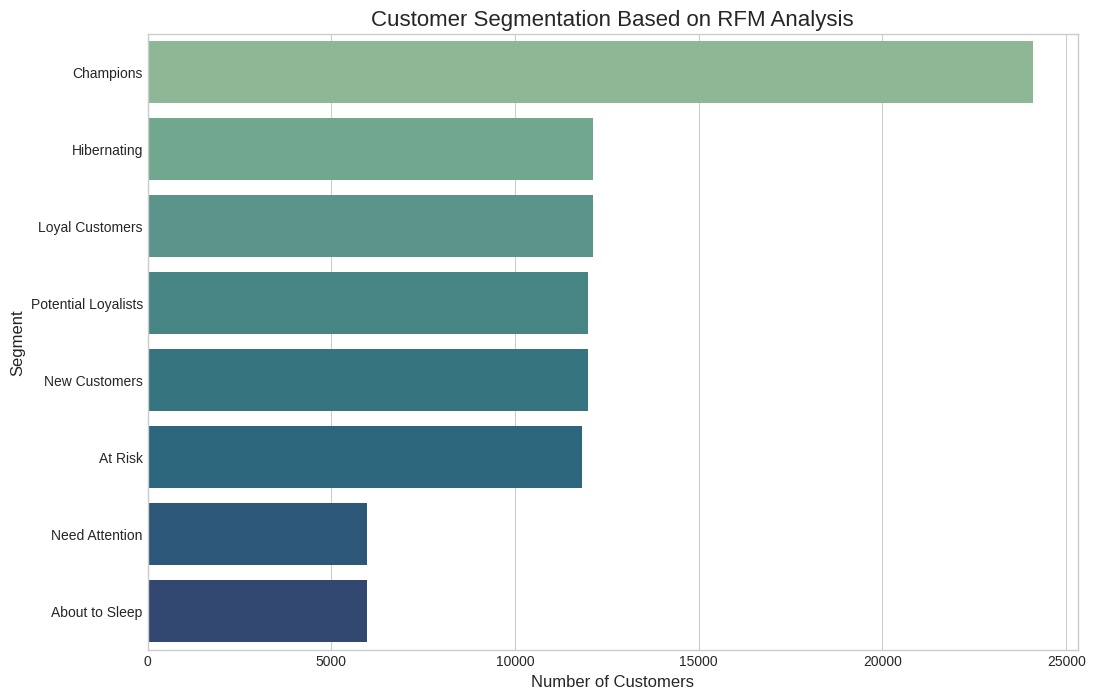

In [19]:
# Hitung jumlah pelanggan di setiap segmen
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)

# Membuat visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='crest')
plt.title('Customer Segmentation Based on RFM Analysis', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.show()

## Conclusion

* Kesimpulan Pertanyaan 1: Kategori produk yang paling diminati oleh pelanggan adalah Bed Bath Table, Health Beauty, dan Sports Leisure. Hal ini mengindikasikan bahwa produk-produk yang berkaitan dengan kebutuhan rumah tangga, perawatan diri, dan gaya hidup aktif memiliki permintaan pasar yang kuat. Sebaliknya, kategori seperti Security and Services dan Fashion Male Clothing termasuk yang paling tidak diminati, menunjukkan peluang untuk evaluasi strategi produk atau pemasaran pada kategori-kategori tersebut.

* Kesimpulan Pertanyaan 2: Mayoritas pelanggan berasal dari negara bagian SP (São Paulo), yang menegaskan posisinya sebagai pusat pasar e-commerce di wilayah tersebut. Metode pembayaran yang paling umum digunakan adalah kartu kredit, yang menunjukkan tingkat kepercayaan dan adopsi yang tinggi terhadap transaksi digital di kalangan pelanggan. Hal ini menandakan pentingnya menyediakan sistem pembayaran kartu kredit yang andal dan aman untuk menjaga kepuasan pelanggan.

* Kesimpulan Analisis Lanjutan: Hasil analisis RFM menunjukkan bahwa basis pelanggan dapat disegmentasikan ke dalam beberapa kelompok yang signifikan. Segmen "Hibernating" (pelanggan yang lama tidak aktif dan jarang bertransaksi) merupakan kelompok terbesar, yang menandakan adanya sejumlah besar pelanggan yang berisiko churn. Di sisi lain, terdapat segmen berharga seperti "Champions" (pelanggan terbaru yang sering bertransaksi) dan "Loyal Customers" (pelanggan setia). Wawasan ini sangat krusial bagi bisnis untuk merancang strategi pemasaran yang berbeda untuk setiap segmen:

- Champions & Loyal Customers: Berikan program loyalitas, penawaran eksklusif, dan minta ulasan produk untuk mempertahankan mereka.

- At Risk & Hibernating: Jalankan kampanye re-engagement melalui diskon khusus atau email marketing untuk menarik mereka kembali bertransaksi.

- New Customers: Fokus pada pengalaman onboarding yang baik untuk mendorong pembelian berulang.